In [2]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from dlstools.pdnx import *
from matplotlib.pyplot import *

#pip install xlwt
#filenum = 815893

# use new modified NeXus file with NXmx in a second subentry
p = '/dls/science/users/spc93/misc_nexus_data/modified/tmp/%i.nxs'
d = '/dls/science/users/spc93/misc_nexus_data/modified/tmp/%i.dat'
e = '/dls/science/users/spc93/misc_nexus_data/modified/tmp/%i.xls'

n = pdnx(p % 815893, entry = None, data = None) # load NeXus file into pdnx (pandas/NeXus) object n

In [3]:
n # display pandas dataframe (all columns in scan)

,eta,beamOK,kphi,kap,kth,kmu,kdelta,kgam,delta_axis_offset,TimeSec,TimeFromEpoch,ic1monitor,rc,count_time,path,maxx,maxy,maxval,sum,roi2_maxx,roi2_maxy,roi2_maxval,roi2_sum
0,30.968,1,64.357,-135.59775,88.55597,0.0,64.693,0.0,8.8,361029.445,1.582424e+09,2160.062235,298.0396,1.0,1,270,7,4.0,2109,4,1,2.0,69
1,30.988,1,64.357,-135.59775,88.57597,0.0,64.693,0.0,8.8,361031.739,1.582424e+09,2161.649749,298.0182,1.0,2,200,108,5.0,2061,26,3,2.0,65
2,31.008,1,64.357,-135.59775,88.59597,0.0,64.693,0.0,8.8,361034.027,1.582424e+09,2160.733886,297.9983,1.0,3,100,160,6.0,1986,7,9,2.0,62
3,31.028,1,64.357,-135.59775,88.61597,0.0,64.693,0.0,8.8,361036.325,1.582424e+09,2160.489628,297.9768,1.0,4,395,41,5.0,2131,22,5,2.0,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,32.508,1,64.357,-135.59775,90.09597,0.0,64.693,0.0,8.8,361229.075,1.582425e+09,2165.007912,301.2459,1.0,78,380,38,4.0,2030,4,25,3.0,58
78,32.528,1,64.357,-135.59775,90.11597,0.0,64.693,0.0,8.8,361231.351,1.582425e+09,2164.061488,301.2260,1.0,79,235,38,4.0,1998,33,11,2.0,57
79,32.548,1,64.357,-135.59775,90.13597,0.0,64.693,0.0,8.8,361233.651,1.582425e+09,2164.458367,301.2092,1.0,80,277,137,4.0,2031,42,31,3.0,42
80,32.568,1,64.357,-135.59775,90.15597,0.0,64.693,0.0,8.8,361235.927,1.582425e+09,2164.397337,301.1894,1.0,81,142,12,4.0,1981,1,4,2.0,70


In [4]:
print(n.nx.tree)

root:NXroot
  @HDF5_Version = '1.10.4'
  @file_name = '/dls/science/users/spc93/misc_nexus_data/modif...'
  @file_time = '2020-05-18T15:56:17.710273'
  @h5py_version = '2.9.0'
  @nexusformat_version = '0.4.18'
  entry1:NXentry
    @default = 'scan'
    before_scan:NXcollection
      @target = '/entry1/before_scan'
      PPR:NXcollection
        ppchi = -44.999841517
        pppiezo1 = 0.0
        pppiezo2 = 12345.012359999999
        ppth1 = 0.0006406764
        ppth2 = -12.0003723606
        ppz1 = 11.0
        ppz2 = 11.0
      alpha:NXcollection
        alpha = -9.057964864867165
      beamline_slits:NXcollection
        s1xcentre = -0.005
        s1xgap = 2.51
        s1ycentre = 0.0015
        s1ygap = 1.001
        s2xcentre = -0.00079375
        s2xgap = 4.9988625
        s2ycentre = 0.499
        s2ygap = 20.001
        s3xcentre = 2.69725
        s3xgap = 25.0015
        s3ycentre = -0.682
        s3ygap = 20.125
        s4xcentre = -5.875
        s4xgap = 36.6504
        s4yc

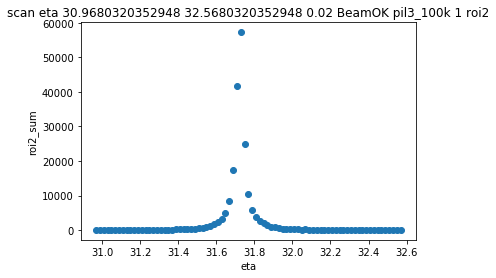

In [5]:
n.nx.plot() # default NeXus plot

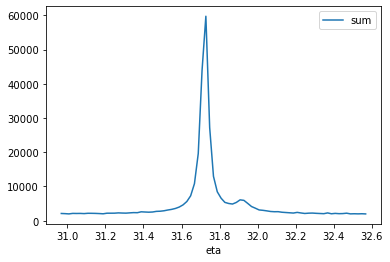

In [6]:
n.plot('eta','sum')  # pandas plot

In [7]:
n['rat'] = n['sum']/n['ic1monitor']  # add a new column (pandas series) to dataframe
n[['eta', 'sum', 'rat']]             # display three fields (including the new one)

,eta,sum,rat
0,30.968,2109,0.976361
1,30.988,2061,0.953438
2,31.008,1986,0.919132
3,31.028,2131,0.986350
...,...,...,...
77,32.508,2030,0.937641
78,32.528,1998,0.923264
79,32.548,2031,0.938341
80,32.568,1981,0.915266


In [8]:
n.to_srs(d % 815893)         # export to classic SRS .dat file
n.to_srs_plus(d % 815894)    # export to enhanced SRS .dat file (metadata as key-value pair assignments)
n.to_excel(e % 815894)       # export to spreadsheet

In [9]:
# open ftir file
ftir = pdnx('/dls/science/users/spc93/misc_nexus_data/ftir1.nxs', entry = None, data = None) # load NeXus file into pdnx (pandas/NeXus) object n

=== Failed to create DataFrame from data - create empty DataFrame


In [10]:
print(ftir.nx.tree)

root:NXroot
  @default = 'entry1'
  entry1:NXentry
    @default = 'map1'
    absorbance:NXdata
      @axes = ['y', 'x', 'wavenumber']
      @signal = 'data'
      @wavenumber_indices = 2
      @x_indices = 1
      @y_indices = 0
      data = float32(64x64x1608)
      wavenumber = float64(1608)
      x = float64(64)
      y = float64(64)
    map1:NXdata
      @axes = ['y', 'x']
      @signal = 'data'
      @x_indices = 1
      @y_indices = 0
      data = float32(64x64)
      x = float64(64)
      y = float64(64)
    map2:NXdata
      @axes = ['y', 'x']
      @signal = 'data'
      @x_indices = 1
      @y_indices = 0
      data = float32(64x64)
      x = float64(64)
      y = float64(64)


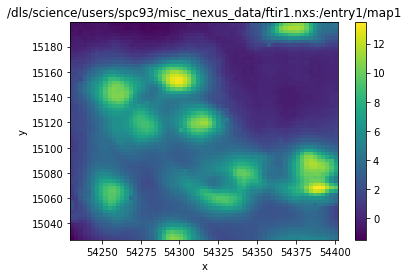

In [11]:
ftir.nx.plot()

In [ ]:
ftir.nx.entry1.map2.plot()

In [1]:
import sys
sys.path.append('/dls_sw/i16/software/python')
from dlstools.pdnx import *
from matplotlib.pyplot import *

infile = '/dls/science/users/spc93/misc_nexus_data/i15-1/i15-1-35653-35653.pe2AD.bragg.nxs'
outfile = '/dls/science/users/spc93/misc_nexus_data/i15-1/i15-1-35653-35653.pe2AD.bragg_xpdfG2test.nxs'

n_out = pdnx(outfile, entry = None, data = None) 
print(n_out.nx.tree)
#n.nx.plot()

n_in = pdnx(infile) 
print(n_in.nx.tree)


=== Importing dlstools package
=== Failed to create DataFrame from data - create empty DataFrame
root:NXroot
  @default = 'processed'
  entry:NXentry
    processed:NXentry
      @default = 'G(R)'
      F(Q):NXdata
        @Q_indices = 0
        @axes = 'Q'
        @signal = 'F(Q)'
        F(Q) = float64(3217)
          @long_name = 'F(Q) ()'
          @units = ''
        Q = float64(3217)
          @long_name = 'Q (Angstrom^-1)'
          @units = 'Angstrom^-1'
      G(R):NXdata
        @axes = 'r'
        @r_indices = 0
        @signal = 'G(R)'
        G(R) = float64(3217)
          @long_name = 'G(R) (Angstrom^-2)'
          @units = 'Angstrom^-2'
        r = float64(3217)
          @long_name = 'r (Angstrom)'
          @units = 'Angstrom'
      I(Q):NXdata
        @Q_indices = 0
        @axes = 'Q'
        @signal = 'I(Q)'
        I(Q) = float64(3217)
          @long_name = 'I(Q) ()'
          @units = ''
        Q = float64(3217)
          @long_name = 'Q (Angstrom^-1)'
          @

In [8]:
n_in.nx.plot()

ValueError: err must be a scalar or a 1D or (2, n) array-like

In [20]:
################## join NeXus files to make one big one #############
import h5py
import sys
import os
sys.path.append('/dls_sw/i16/software/python')
from dlstools.pdnx import *


p = '/dls/i16/data/2020/cm26473-2/%i.nxs'

folder = '/dls/i16/data/2020/cm26473-2/*.nxs'
ff = os.popen('ls ' + folder)
nx_file_list = ff.read().splitlines()
print(len(nx_file_list))

###################### use h5py or nexpy to join ?????????????????????



858


In [26]:
import h5py
f = h5py.File(nx_file_list[0], 'r')
f.keys()

outfile = '/dls/science/users/spc93/misc_nexus_data/modified/tmp/big1.nxs'

#f = h5py.File("mytestfile.hdf5", "w")
#dset = f.create_dataset("mydataset", (100,), dtype='i')

<KeysViewHDF5 ['entry1']>

<HDF5 file "823286.nxs" (mode r)>